# 0. Data Load

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc 
import platform

# 그래프에서 한글을 표기하기 위해 글꼴 변경 
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system() == 'Darwin':   # macOS
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

In [183]:
senior_pop = pd.read_csv('./year_pop.csv', encoding = 'utf-8')
year_pop = pd.read_csv('./seoul_population.csv', encoding = 'utf-8')
gene_pop = pd.read_csv('./pop_ge.csv', encoding = 'utf-8')

## 데이터 살펴보기

In [52]:
senior_pop.head()

,동별(1),동별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,동별(1),동별(2),65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구
1,합계,소계,1049425,1110995,1167177,1221616,1267563,1300877,1365126,1416131,1485272,1568331,1605416
2,합계,종로구,22939,23868,23997,24537,24892,25091,26182,26742,27519,28507,27818
3,합계,중구,18099,18875,19346,19960,20302,20606,21384,22005,23275,24495,24392
4,합계,용산구,31837,33027,34017,34896,35715,35915,36882,37640,38791,40247,39070


In [53]:
year_pop.head()

,동별(1),동별(2),2022 1/4,2022 1/4.1,2022 1/4.2,2022 1/4.3,2022 1/4.4,2022 1/4.5,2022 1/2,2022 1/2.1,2022 1/2.2,2022 1/2.3,2022 1/2.4,2022 1/2.5
0,동별(1),동별(2),세대 (세대),계,한국인,등록외국인,세대당인구,65세이상고령자,세대 (세대),계,한국인,등록외국인,세대당인구,65세이상고령자
1,합계,소계,4451444,9732617,9506778,225839,2.14,1628980,4464840,9725417,9494807,230610,2.13,1641813
2,합계,종로구,73766,153684,144275,9409,1.96,28064,73728,153255,143624,9631,1.95,28170
3,합계,중구,63767,131450,122173,9277,1.92,24742,63958,131673,122088,9585,1.91,24948
4,합계,용산구,111207,236518,222169,14349,2,39461,111860,236632,222263,14369,1.99,39615


In [76]:
gene_pop.head()

,연도,인구구성비:0~14세 (명),인구구성비:15~64세 (명),인구구성비:65세이상 (명),노령화지수 (명)
0,2017,11.3,75.5,13.2,117.2
1,2018,10.9,75.2,13.8,126.8
2,2019,10.6,75.0,14.5,137.0
3,2020,10.3,74.4,15.4,149.4
4,2021,10.0,73.8,16.3,163.4


# 1. EDA

## 1) 서울시 노인 인구 추세

In [70]:
senior_pop = senior_pop.loc[[1]]
senior_pop

,동별(1),동별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,합계,소계,1049425,1110995,1167177,1221616,1267563,1300877,1365126,1416131,1485272,1568331,1605416


In [71]:
senior_pop = senior_pop.drop(['동별(1)', '동별(2)'], axis = 1)
senior_pop

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,1049425,1110995,1167177,1221616,1267563,1300877,1365126,1416131,1485272,1568331,1605416


In [72]:
senior_pop = senior_pop.astype('int')

In [73]:
senior_pop = senior_pop.transpose()
senior_pop

,1
2011,1049425
2012,1110995
2013,1167177
2014,1221616
2015,1267563
2016,1300877
2017,1365126
2018,1416131
2019,1485272
2020,1568331


Text(0.5, 1.0, '서울시 노인 인구 추세 (2011 ~ 2021)')

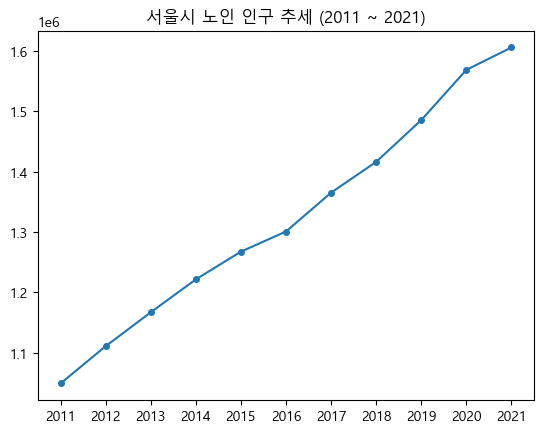

In [75]:
plt.plot(senior_pop, marker = 'o', markersize = 4)
plt.title('서울시 노인 인구 추세 (2011 ~ 2021)')

## 2) 연령대별 인구 변화

In [96]:
gene_pop.set_index('연도', inplace = True)
gene_pop.head()

,인구구성비:0~14세 (명),인구구성비:15~64세 (명),인구구성비:65세이상 (명),노령화지수 (명)
연도,,,,
2017,11.3,75.5,13.2,117.2
2018,10.9,75.2,13.8,126.8
2019,10.6,75.0,14.5,137.0
2020,10.3,74.4,15.4,149.4
2021,10.0,73.8,16.3,163.4


In [98]:
gene_pop.columns = ['0~14세', '15~64세', '65세 이상', '노령화 지수']
gene_pop.head()

,0~14세,15~64세,65세 이상,노령화 지수
연도,,,,
2017,11.3,75.5,13.2,117.2
2018,10.9,75.2,13.8,126.8
2019,10.6,75.0,14.5,137.0
2020,10.3,74.4,15.4,149.4
2021,10.0,73.8,16.3,163.4


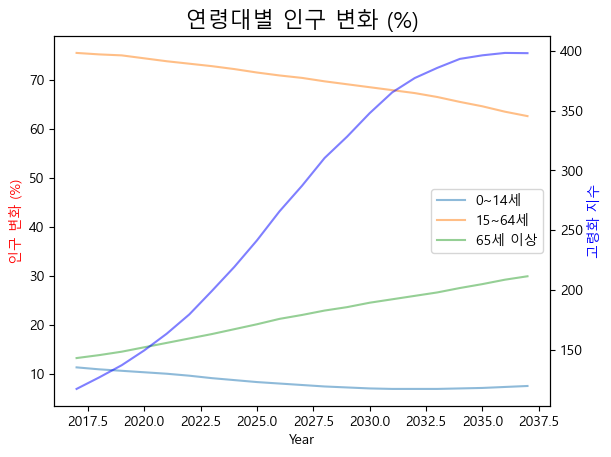

In [ ]:
x = gene_pop.index
y1 = gene_pop.iloc[:, 0:3]
y2 = gene_pop['노령화 지수']

# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig, ax1 = plt.subplots()
ax1.set_title('연령대별 인구 변화 (%)', fontsize=16)
ax1.set_xlabel('Year')

ax1.plot(x, y1, alpha = 0.5, )
ax1.legend(('0~14세', '15~64세','65세 이상'))
ax1.set_ylabel('인구 변화 (%)', fontsize = 10, color = 'red')

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, color = 'blue', alpha = 0.5)
ax2.set_ylabel('고령화 지수', fontsize = 10, color = 'blue')
plt.show()

## 3) 서울시 자치구 별 노인 인구 거주 현황

In [184]:
df_2022 = year_pop.loc[2:, ['동별(2)','2022 1/2.5']]
df_2022

,동별(2),2022 1/2.5
2,종로구,28170
3,중구,24948
4,용산구,39615
5,성동구,47152
6,광진구,53009
7,동대문구,63427
8,중랑구,73465
9,성북구,76257
10,강북구,65317
11,도봉구,65693


In [185]:
df_2022.rename(columns = {'동별(2)':'자치구별', '2022 1/2.5':'노인 인구'}, inplace = True)
df_2022.head()

,자치구별,노인 인구
2,종로구,28170
3,중구,24948
4,용산구,39615
5,성동구,47152
6,광진구,53009


In [186]:
df_2022.set_index('자치구별', inplace = True)

In [187]:
df_2022 = df_2022.astype({'노인 인구' : 'int'})

In [188]:
df_2022.sort_values(by = '노인 인구', inplace = True)

Text(0.5, 1.0, '서울시 자치구별 노인 거주 인구 현황 (2022)')

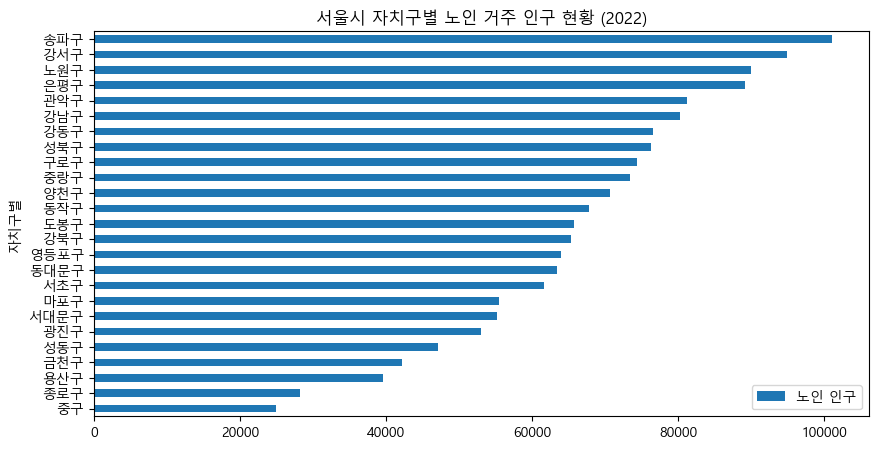

In [189]:
df_2022.plot(kind = 'barh', width = 0.5, figsize = (10,5))
plt.title('서울시 자치구별 노인 거주 인구 현황 (2022)')

## 4) folium 활용 지도에 나타내기

In [194]:
gene_map = df_2022.reset_index()
gene_map.head()

,자치구별,노인 인구
0,중구,24948
1,종로구,28170
2,용산구,39615
3,금천구,42230
4,성동구,47152


In [126]:
import folium

center = [37.541, 126.986]

m = folium.Map(location = [center[0], center[1]], zoom_start = 12)

m

In [127]:
import json
geo_path = './test.json'

geo_str = json.load(open(geo_path, encoding = 'utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [196]:
folium.Choropleth(
    geo_data = geo_str,
    data = gene_map,
    columns = ('자치구별', '노인 인구'),
    fill_color = 'BuPu',
    key_on='feature.id',
    legend_name = '노령 인구수'
).add_to(m)

m